In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import matplotlib.cm as cm
import pickle

In [2]:
root = '/Users/Jonas'
# path = '/Library/CloudStorage/OneDrive-UvA/data/Topological defects/experiment/Melanie_N=3/movies'
path = '/Downloads'
name  ='/tm_trajectory/'

lst =np.array( os.listdir(root+path+'/pickle'+name))
data=[]
idx = np.argsort(np.float32(lst))
for i in lst[idx]:
    with (open(root+path+'/pickle'+name+ i ,'rb')) as openfile:
        raw,timestamps = pickle.load(openfile)
        data.append(raw)
data=np.array(data)[:,:,0,:]

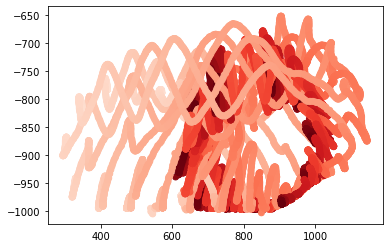

In [4]:


# sumdata = np.sum(data,axis=2) 
tf = np.argwhere(data==0.0)
tf = np.min(tf[:,1])
tf=tf-30
tf=1600

x = data[:,:tf,0]
y = -data[:,:tf,1]
r = data[:,:tf,2]
ycom=np.average(y,axis=0)
xcom=np.average(x,axis=0)

pos =  x+1j*y

colors = plt.cm.Reds(np.linspace(0.,1,tf))
# colors[:,-1] = np.linspace(0.5,1,t) 
for i,j in zip(x,y):
    plt.scatter(i[:tf],j[:tf],c=colors)


(-230.0, 230.0, -200.0, 200.0)

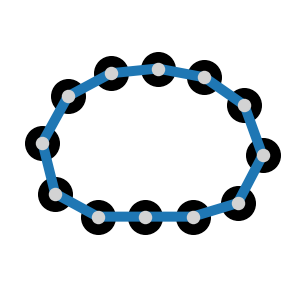

In [31]:
fig,ax= plt.subplots(1,1,figsize=(3,3),dpi=120)
x0 = x[:,0] 
y0 = y[:,1]
x0=x0-np.average(x0)
y0=y0-np.average(y0)


ax.fill(x0,y0,fill=False,lw=6,c='C0')
ax.scatter(x0,y0,c='k',s=400,zorder=-10)
ax.scatter(x0,y0,c='lightgrey',s=50)


ax.set_xlim([-230,230])
ax.set_ylim([-200,200])

# plt.gca().set_aspect('equal')

plt.axis('off')
# for n,[i,j] in enumerate(zip(x[:,0],y[:,0])):
#     plt.annotate(str(n+1),[i,j],fontsize=16,c='r')

<ipython-input-439-b7948a2f3985>:5: RuntimeWarning: invalid value encountered in true_divide
  rh=r/mag #UNIT VECTOR BETWEEN NEIGHBORS


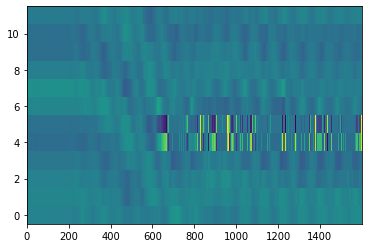

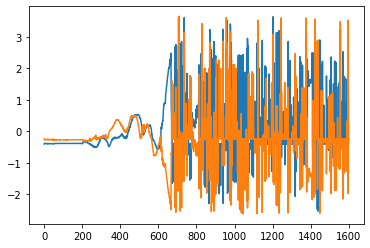

In [439]:
def get_angles(N,pos):
    teq=np.pi*(N-2)/N #EQUILIBRIUM ANGLE
    r=np.roll(pos,-1,axis=0)-pos #DISTANCE BETWEEN NEIGHBORS
    mag=np.absolute(r)  # MAGNITUDE OF DISTANCE BETWEEN NEIGHBORS
    rh=r/mag #UNIT VECTOR BETWEEN NEIGHBORS
    th=np.angle(-rh/np.roll(rh,1,axis=0))%(2*np.pi) #ANGLE BETWEEN NEIGHBORS
    dth=th-teq # DTHETA, ANGLE DEVIATION FROM EQUILIBRIUMN ANGLE
    return dth
dth= get_angles(12,x+1j*y) 
dth[4] = np.nan_to_num(dth[4],nan=dth[4,0])
dth[5] = np.nan_to_num(dth[5],nan=dth[5,0])


plt.imshow(dth,aspect='auto',origin='lower',interpolation='none')
plt.show()

plt.plot(dth[4])
plt.plot(dth[5])



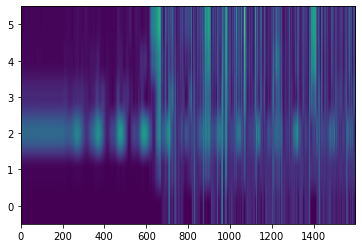

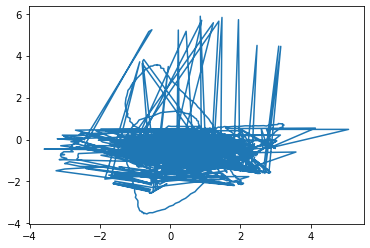

In [440]:
fft = np.fft.fft(dth,axis=0)
fftfreq = np.fft.fftfreq(dth.shape[0])
fft=fft[:int(fft.shape[0]/2),:]    
plt.imshow(np.abs(fft),aspect='auto',origin='lower')
plt.show()
S = fft[2]

S1,S2 = np.real(S),np.imag(S)
plt.plot(S1,S2)
argphi=np.angle(S)

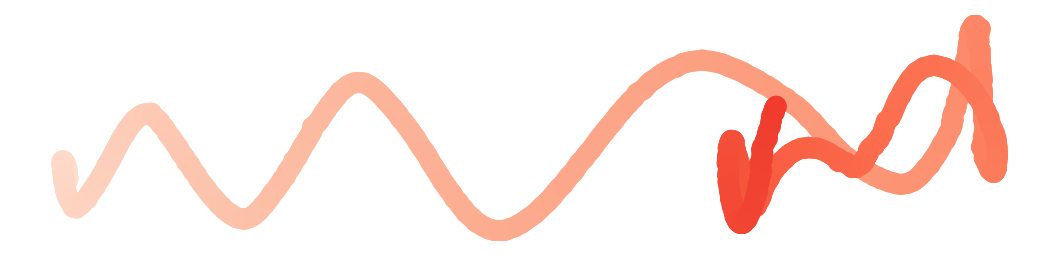

In [441]:
plt.figure(figsize=(20,2),dpi=150)
plt.axis('off')
plt.gca().set_aspect('equal')
argphi_norm = (argphi-np.min(argphi))
argphi_norm /= np.max(argphi_norm)

# argphi_norm[700:1200] = argphi_norm[100:600]
colors = cm.hsv(argphi_norm)

color_t = cm.Reds(np.linspace(0,1,len(argphi_norm)))


for n,[x,y,c] in enumerate(zip(xcom,ycom,color_t)):
    if n<1000:
        plt.plot(xcom[n:n+2],ycom[n:n+2],c=c,lw=10,solid_capstyle='round')
    else:
        pass
    
    # plt.scatter(xcom[n],ycom[n]),color=c,s=30)
plt.show()


In [442]:
t=600
x,y,r = raw.T[:,:,:t]
pos = x+1j*y
com = np.average(pos,axis=0)
# plt.plot(np.real(com[:t]),np.imag(com[:t]))
dX = np.abs(pos[1]-pos[0])

dX=dX-np.average([np.min(dX),np.max(dX)])


plt.plot(dX)


IndexError: index 1 is out of bounds for axis 0 with size 1

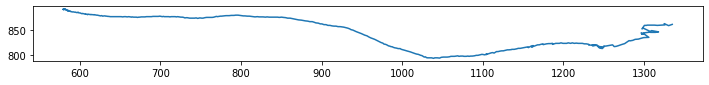

In [75]:
plt.figure(figsize=(12,1))
plt.plot(np.real(com),np.imag(com))

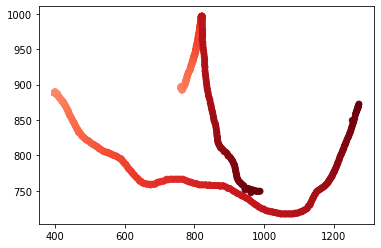

In [48]:

colors = plt.cm.Reds(np.linspace(0.,1,t))
# colors[:,-1] = np.linspace(0.5,1,t) 
for i,j in zip(x,y):
    plt.scatter(i[:t],j[:t],c=colors)

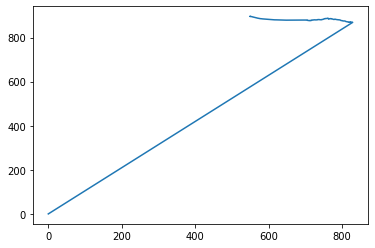

In [13]:
plt.plot(np.real(com),np.imag(com))